# Dementia Risk Prediction Project

In [41]:
!pip install -U imbalanced-learn

   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ---------------------------------------- 257.7/257.7 kB 8.0 MB/s eta 0:00:00


# Introduction

* Our specialized AI and healthcare team collaborates with Synapxe, a major health-tech agency in Singapore, and SingHealth.
* Objective: To address the pressing issue of dementia diagnosis and prevention.
1. Nas: Responsible for predicting the "Dementia" target variable using the "dementia_patients_health_data" dataset.
2. Skye: Focuses on prescription recommendation prediction based on the "Prescription" column in the same dataset.
3. Jia Jun: In charge of MRI scan predictions.


* Project Focus: Providing vital home care support for Singapore's aging population facing a growing dementia challenge.
* Importance: Early detection and prevention are paramount for patient and family well-being.
* Project Environment: Developed within the Anaconda environment using a Conda environment named "applied_ai_project."
* Collaboration: The team collaborates to host these three models on a web application deployed in the cloud.

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('dementia_patients_health_data.csv')

# Display the first few rows of the dataframe
df.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1


## Problem Statement
Dementia is a leading cause of disability and death among the elderly. Its gradual onset often leads to delayed diagnosis, complicating care. Our mission is to develop technology-driven solutions for early detection and continuous monitoring of dementia, alleviating the burden on patients and caregivers.

## Approach
We'll leverage MLOps for efficient model deployment and follow the CRISP-DM methodology for structured data mining and AI model development. Our solution aligns with Singapore's healthcare goals, addressing a critical community need.

# Data Collection

* Description of the data sources
* Process of data collection

https://www.kaggle.com/datasets/kaggler2412/dementia-patient-health-and-prescriptions-dataset	

# Exploratory Data Analysis (EDA)

* Initial examination of the data
* Statistical summaries and visualizations
* Identifying patterns, anomalies, or interesting characteristics

In [3]:
# Getting the shape of the DataFrame
df.shape

(1000, 24)

### View Columns

In [4]:
# Getting the shape of the DataFrame
df_shape = df.shape

# Analyzing the data types and unique values in each column
column_analysis = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': [df[col].dtype for col in df.columns],
    'Unique Values': [df[col].nunique() for col in df.columns],
})

print("DataFrame Shape:", df_shape)
print("\nColumn Analysis:")
print(column_analysis)

DataFrame Shape: (1000, 24)

Column Analysis:
                  Column Name Data Type  Unique Values
0                    Diabetic     int64              2
1                AlcoholLevel   float64           1000
2                   HeartRate     int64             41
3            BloodOxygenLevel   float64           1000
4             BodyTemperature   float64           1000
5                      Weight   float64           1000
6                   MRI_Delay   float64           1000
7                Prescription    object              4
8                Dosage in mg   float64             10
9                         Age     int64             31
10            Education_Level    object              4
11              Dominant_Hand    object              2
12                     Gender    object              2
13             Family_History    object              2
14             Smoking_Status    object              3
15                    APOE_ε4    object              2
16          Physica

### View Values in Categorical Column

In [5]:
# Function to determine if a column is categorical
def is_categorical(series, threshold=0.1):
    if series.dtype == object or series.nunique() / len(series) < threshold:
        return True
    return False

# Applying the function to each column in the DataFrame
categorical_columns = [col for col in df.columns if is_categorical(df[col])]

# Printing the names of the categorical columns
print("Categorical columns:")
print(categorical_columns)

# Displaying the unique values for each categorical column
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())

Categorical columns:
['Diabetic', 'HeartRate', 'Prescription', 'Dosage in mg', 'Age', 'Education_Level', 'Dominant_Hand', 'Gender', 'Family_History', 'Smoking_Status', 'APOE_ε4', 'Physical_Activity', 'Depression_Status', 'Cognitive_Test_Scores', 'Medication_History', 'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions', 'Dementia']

Unique values in 'Diabetic':
[1 0]

Unique values in 'HeartRate':
[ 98  78  89  60  67  94  90  69  64  97  93  91  95  84  74  82  76  99
  77  66  87  75  88  83  71  70  96  61  80  85  63  72  65  73  79  68
  62  81  92 100  86]

Unique values in 'Prescription':
[nan 'Galantamine' 'Donepezil' 'Memantine' 'Rivastigmine']

Unique values in 'Dosage in mg':
[ nan 12.  23.  20.   1.5 10.   3.   5.   6.   8.   4. ]

Unique values in 'Age':
[60 61 69 78 77 67 87 66 73 76 64 90 89 72 85 70 75 71 88 63 83 74 79 65
 62 82 84 68 81 80 86]

Unique values in 'Education_Level':
['Primary School' 'Secondary School' 'No School' 'Diploma/Degree']

Unique valu

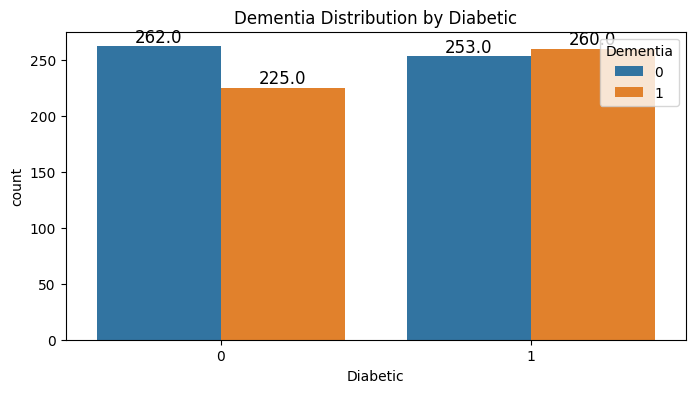

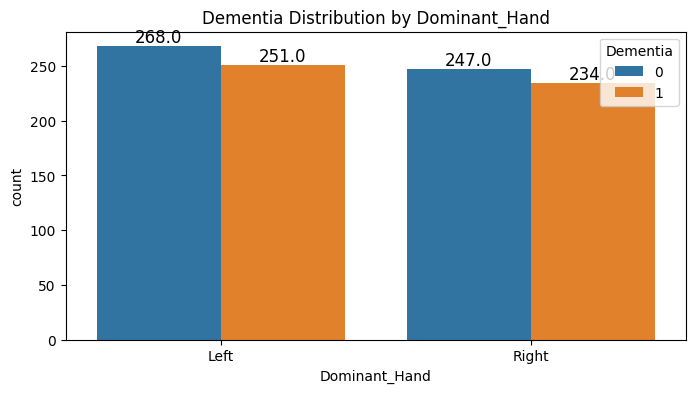

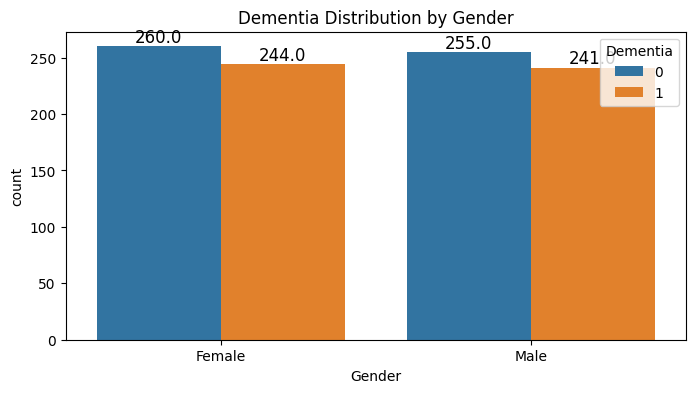

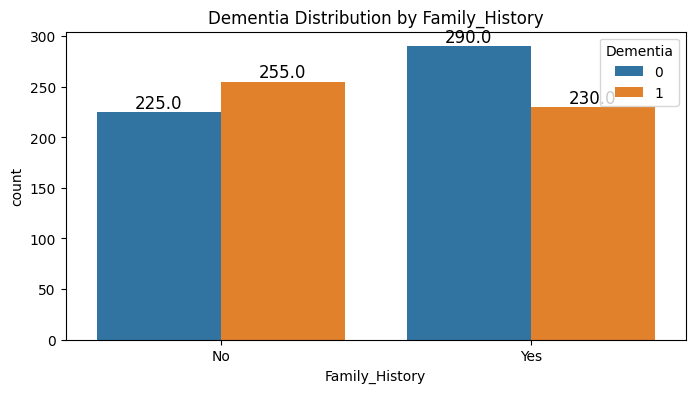

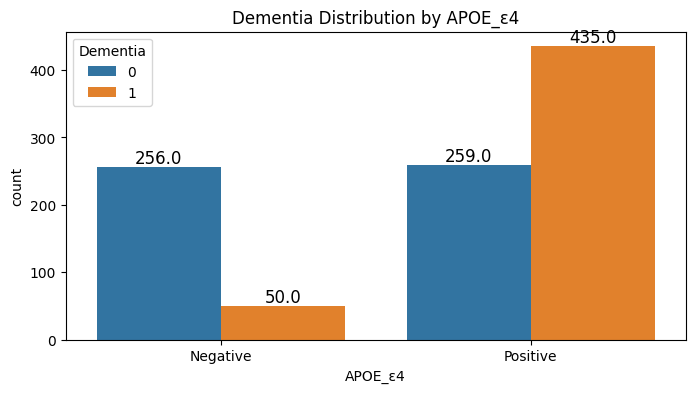

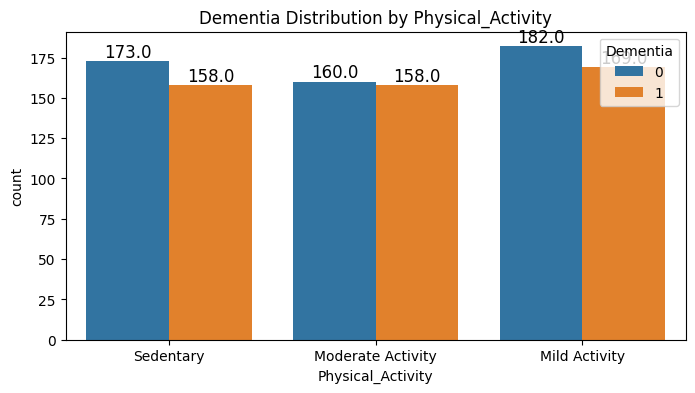

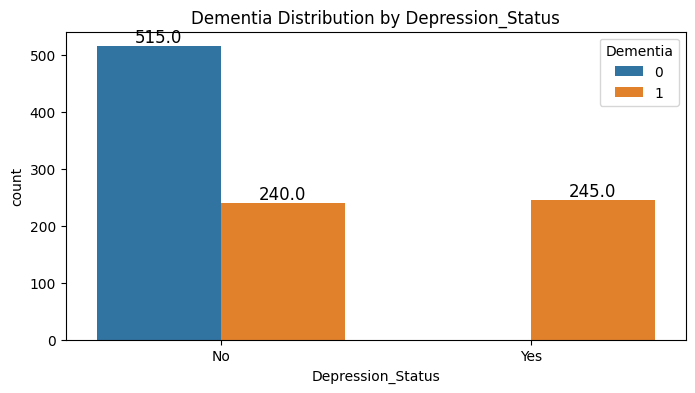

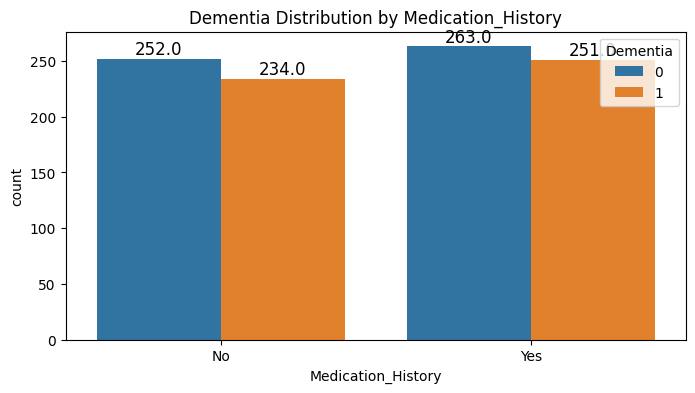

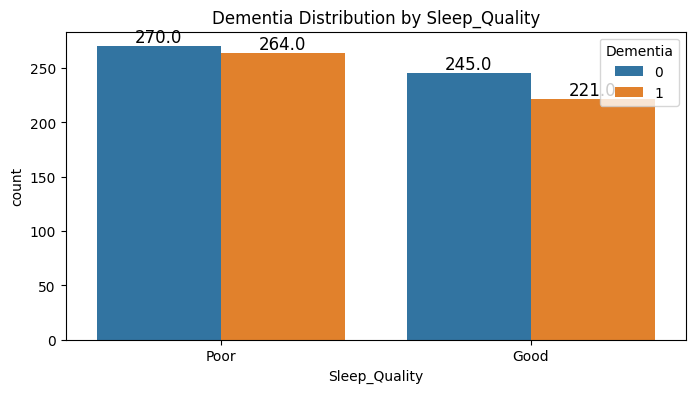

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# For each binary categorical column
binary_columns = ['Diabetic', 'Dominant_Hand', 'Gender', 'Family_History', 'APOE_ε4', 'Physical_Activity', 'Depression_Status', 'Medication_History', 'Sleep_Quality']

for col in binary_columns:
    plt.figure(figsize=(8, 4))
    
    # Create a countplot
    ax = sns.countplot(x=col, hue='Dementia', data=df)
    plt.title(f'Dementia Distribution by {col}')
    
    # Add counts within the bars
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12, color='black')
    
    plt.show()


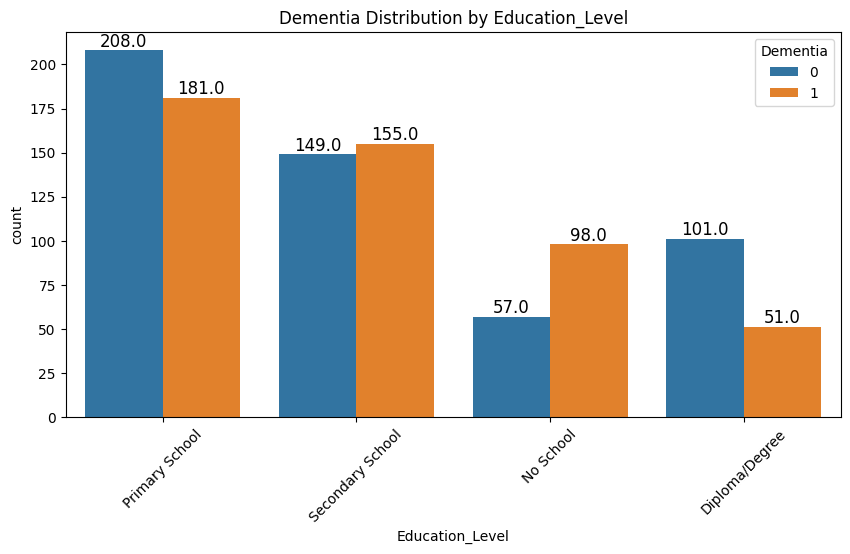

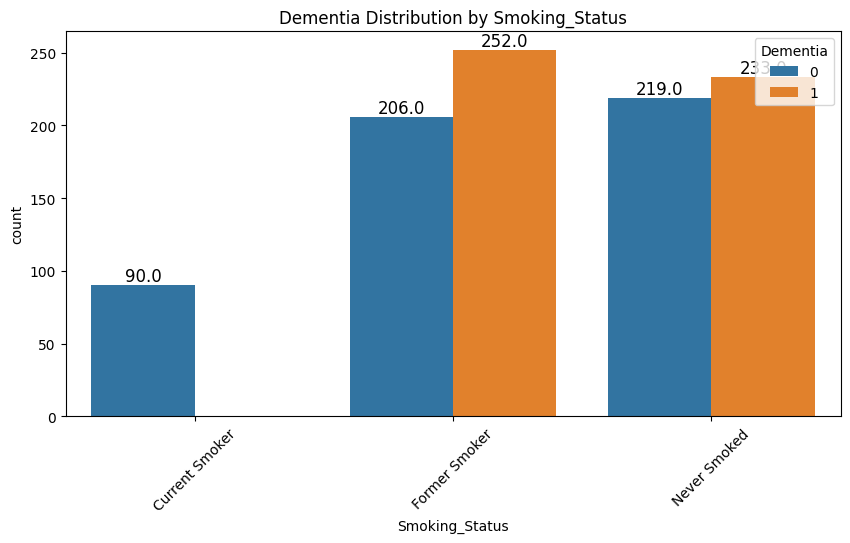

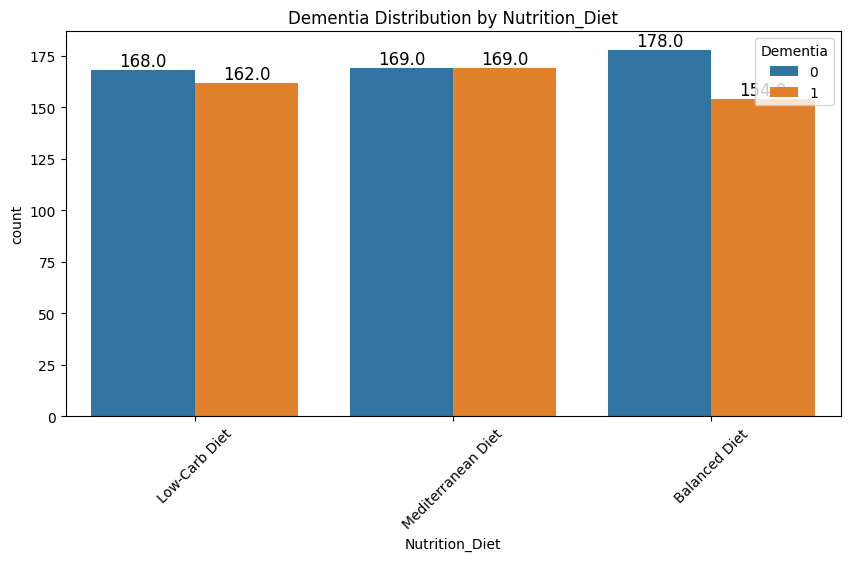

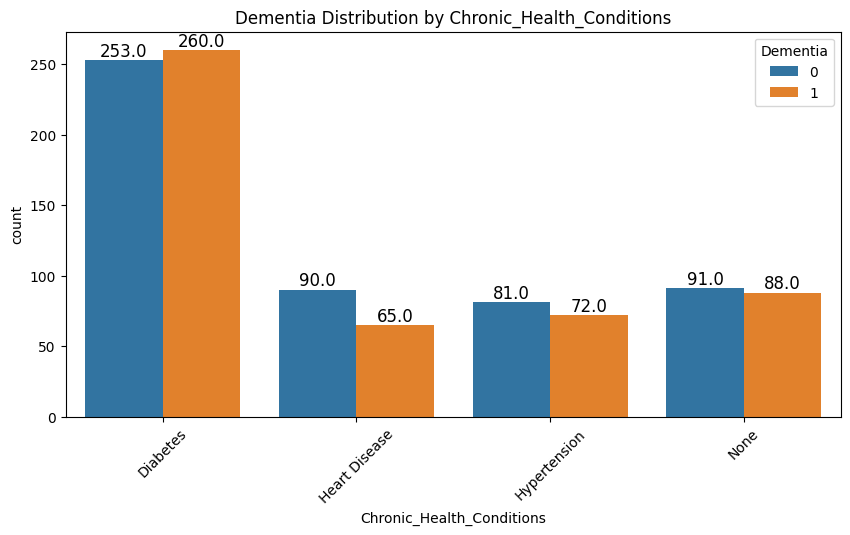

In [7]:
ordinal_columns = ['Education_Level', 'Smoking_Status', 'Nutrition_Diet', 'Chronic_Health_Conditions']

for col in ordinal_columns:
    plt.figure(figsize=(10, 5))
    
    # Create a countplot
    ax = sns.countplot(x=col, hue='Dementia', data=df)
    plt.title(f'Dementia Distribution by {col}')
    plt.legend(title='Dementia', loc='upper right')
    plt.xticks(rotation=45)  # Rotate the x labels if they overlap
    
    # Add counts within the bars
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12, color='black')
    
    plt.show()


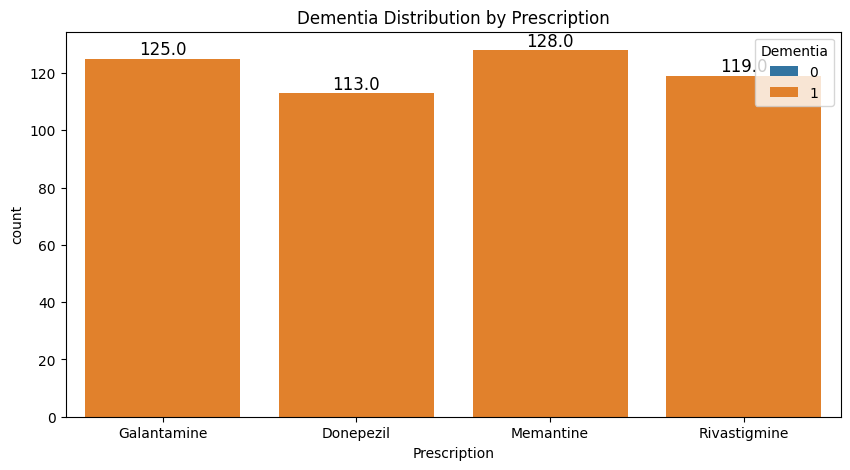

In [8]:
non_ordinal_categorical_columns = ['Prescription']

for col in non_ordinal_categorical_columns:
    plt.figure(figsize=(10, 5))
    
    # Create a countplot
    ax = sns.countplot(x=col, hue='Dementia', data=df)
    plt.title(f'Dementia Distribution by {col}')
    plt.legend(title='Dementia', loc='upper right')
    
    # Add counts within the bars
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12, color='black')
    
    plt.show()


#### Interaction Effect of Education Level and Gender on Dementia


- `sns.pointplot(x='Education_Level', y='Dementia', hue='Gender', data=df, palette='Set2', dodge=True)`: This line of code creates the point plot.

    - `x='Education_Level'`: The x-axis of the plot represents the 'Education_Level' column from the dataset `df`. It categorizes individuals based on their education level.
    
    - `y='Dementia'`: The y-axis of the plot represents the 'Dementia' column from the dataset. It indicates the prevalence of dementia.
    
    - `hue='Gender'`: The 'Gender' column is used to differentiate data points. In this plot, two different colors are used—one for males and another for females. This allows us to compare how the interaction effect differs between genders.
    
    - `data=df`: The data for this plot is sourced from the DataFrame `df`.
    
    - `palette='Set2'`: The color palette 'Set2' is applied to the plot to distinguish between different genders effectively.
    
    - `dodge=True`: The dodge parameter ensures that data points for males and females are displayed side by side rather than overlapping, making it easier to interpret the int effect graphically.

In summary, this visualization helps us understand how education level and gender jointly influence the likelihood of having dementia. By comparing the points for males and females across different education levels, we can assess whether there are gender-specific patterns in the relationship between education and dementia prevalence.
 dementia prevalence.


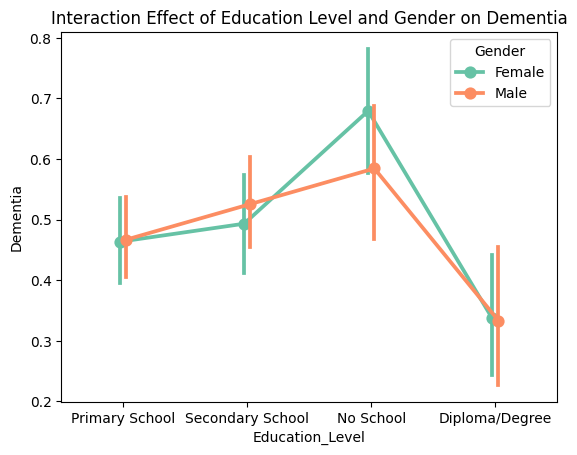

In [9]:
sns.pointplot(x='Education_Level', y='Dementia', hue='Gender', data=df, palette='Set2', dodge=True)
plt.title('Interaction Effect of Education Level and Gender on Dementia')
plt.show()


Explanation:
* This code snippet utilizes Python libraries such as Seaborn and Matplotlib to create informative boxplots for data visualization within a Jupyter Notebook. Specifically, it focuses on two continuous variables, 'HeartRate' and 'Age,' to investigate their distribution concerning the presence or absence of dementia ('Dementia'). The loop iterates over each of these columns, creating separate boxplots that showcase how these variables vary in relation to dementia. The resulting visualizations provide a clear and concise means of understanding the data distribution, aiding in the exploration and analysis of potential patterns or insights.




C:\Users\nasru\AppData\Local\Temp\ipykernel_14528\1496689300.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dementia', y=col, data=df, palette='Set2')  # Add palette parameter for color


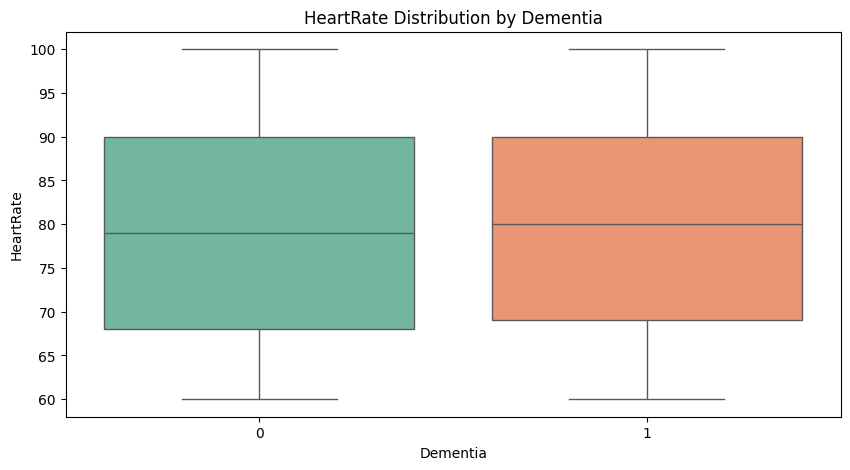

C:\Users\nasru\AppData\Local\Temp\ipykernel_14528\1496689300.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dementia', y=col, data=df, palette='Set2')  # Add palette parameter for color


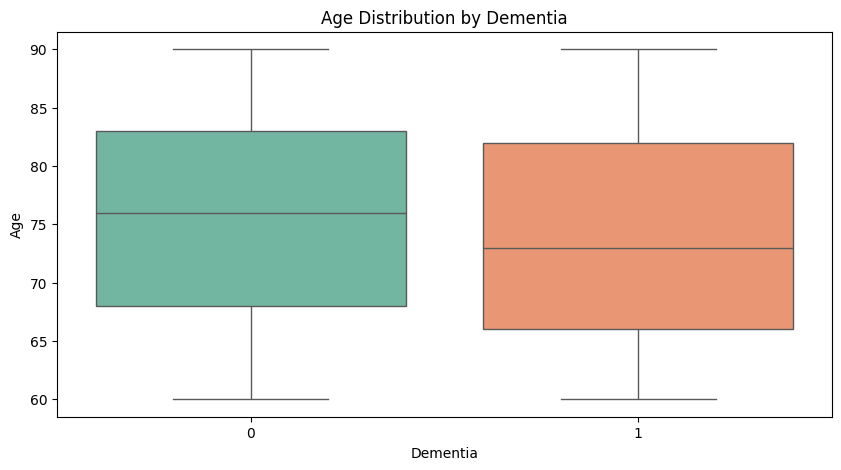

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

continuous_columns = ['HeartRate', 'Age']

for col in continuous_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Dementia', y=col, data=df, palette='Set2')  # Add palette parameter for color
    plt.title(f'{col} Distribution by Dementia')
    plt.show()


C:\Users\nasru\AppData\Local\Temp\ipykernel_14528\3593635254.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_all = df.corr()


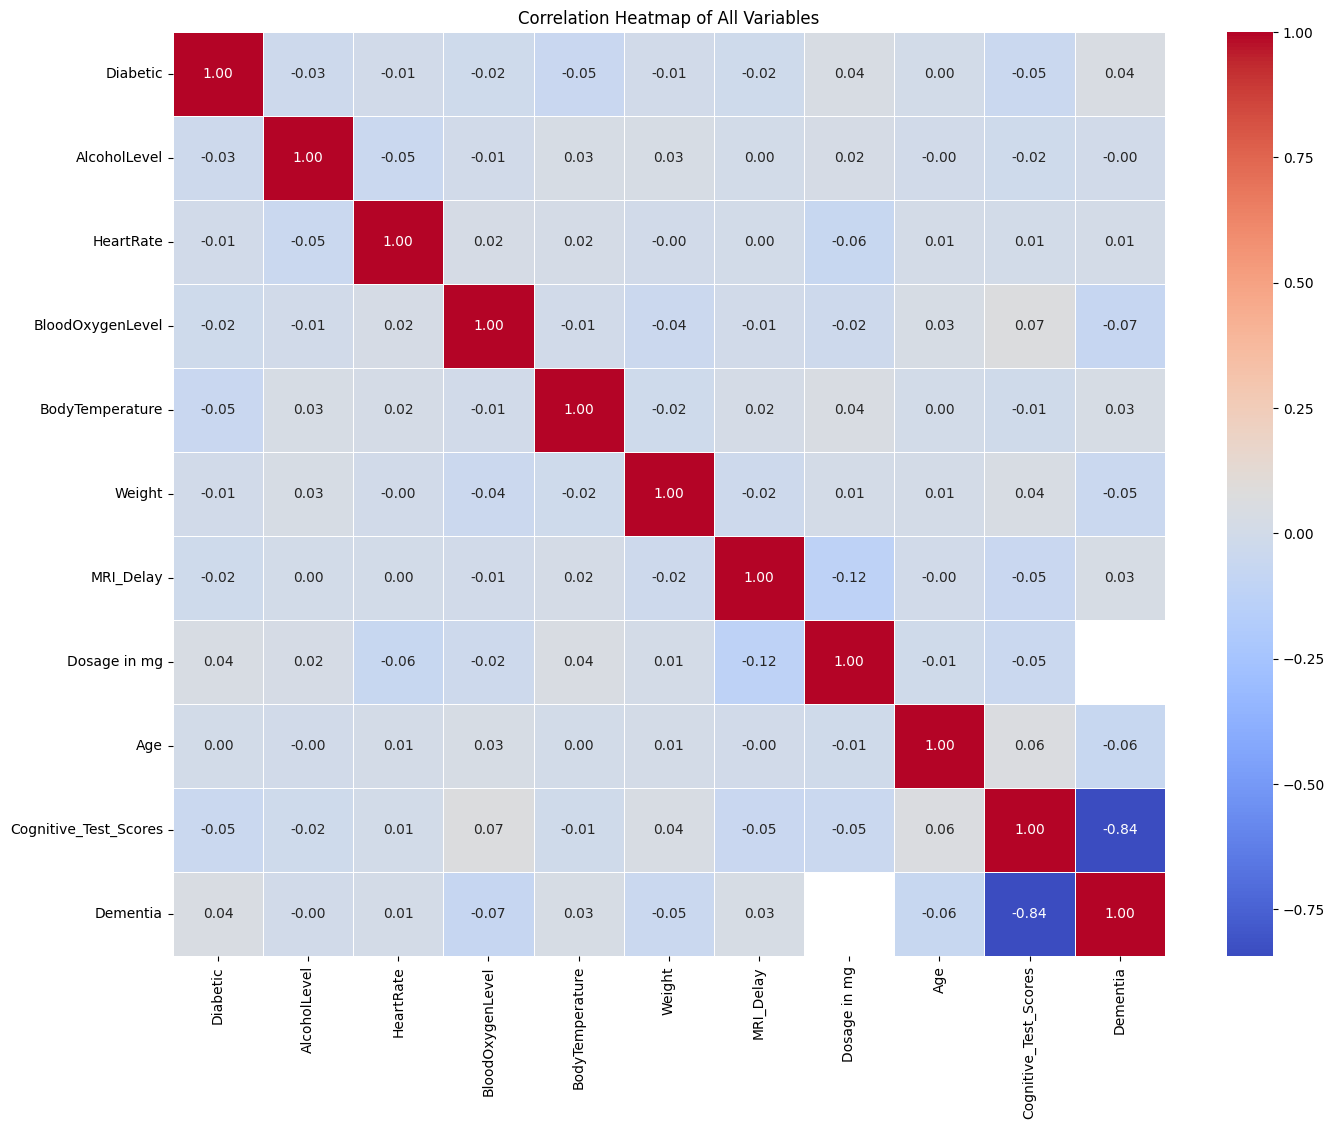

In [11]:
# Calculate the correlation matrix for all columns in the DataFrame
correlation_matrix_all = df.corr()

# Create a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of All Variables")
plt.show()


# Data Cleaning

* Handling missing valuers
* Corrections and transformations

In [12]:
# Create a copy of the DataFrame
df_cleaned = df.copy()

### Handling missing values

In [13]:
# Check for missing values in each column
missing_values = df_cleaned.isnull().sum()

# Display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]
print("Columns with missing values:")
print(columns_with_missing_values)

Columns with missing values:
Prescription    515
Dosage in mg    515
dtype: int64


In [14]:
# Create a copy of the original DataFrame for cleaning
df_cleaned = df.copy()

# Remove columns with missing values: 'Prescription' and 'Dosage in mg'
df_cleaned.drop(columns=['Prescription', 'Dosage in mg'], inplace=True)


* Explanation:
I decided to remove the 'Prescription' and 'Dosage in mg' columns from the dataset during data cleaning. These columns had a significant number of missing values (515 missing values each), making it challenging to impute or use them effectively in our analysis. Additionally, since the presence or absence of prescription medication and dosage may not be central to our current analysis of dementia prediction, removing them will simplify the dataset and focus our analysis on more relevant features. The cleaned data is stored in a new DataFrame called 'df_cleaned,' allowing us to proceed with our analysis without unnecessary columns.

In [15]:
# Check for missing values in each column
missing_values = df_cleaned.isnull().sum()

# Display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]
print("Columns with missing values:")
print(columns_with_missing_values)

Columns with missing values:
Series([], dtype: int64)


In [16]:
# Getting the shape of the DataFrame

# Analyzing the data types and unique values in each column
column_analysis = pd.DataFrame({
    'Column Name': df_cleaned.columns,
    'Data Type': [df_cleaned[col].dtype for col in df_cleaned.columns],
    'Unique Values': [df_cleaned[col].nunique() for col in df_cleaned.columns],
})

print("\nColumn Analysis:", df_cleaned.shape)
print(column_analysis)


Column Analysis: (1000, 22)
                  Column Name Data Type  Unique Values
0                    Diabetic     int64              2
1                AlcoholLevel   float64           1000
2                   HeartRate     int64             41
3            BloodOxygenLevel   float64           1000
4             BodyTemperature   float64           1000
5                      Weight   float64           1000
6                   MRI_Delay   float64           1000
7                         Age     int64             31
8             Education_Level    object              4
9               Dominant_Hand    object              2
10                     Gender    object              2
11             Family_History    object              2
12             Smoking_Status    object              3
13                    APOE_ε4    object              2
14          Physical_Activity    object              3
15          Depression_Status    object              2
16      Cognitive_Test_Scores     in

In [17]:
df_cleaned.shape

(1000, 22)

### Correlation Matrix

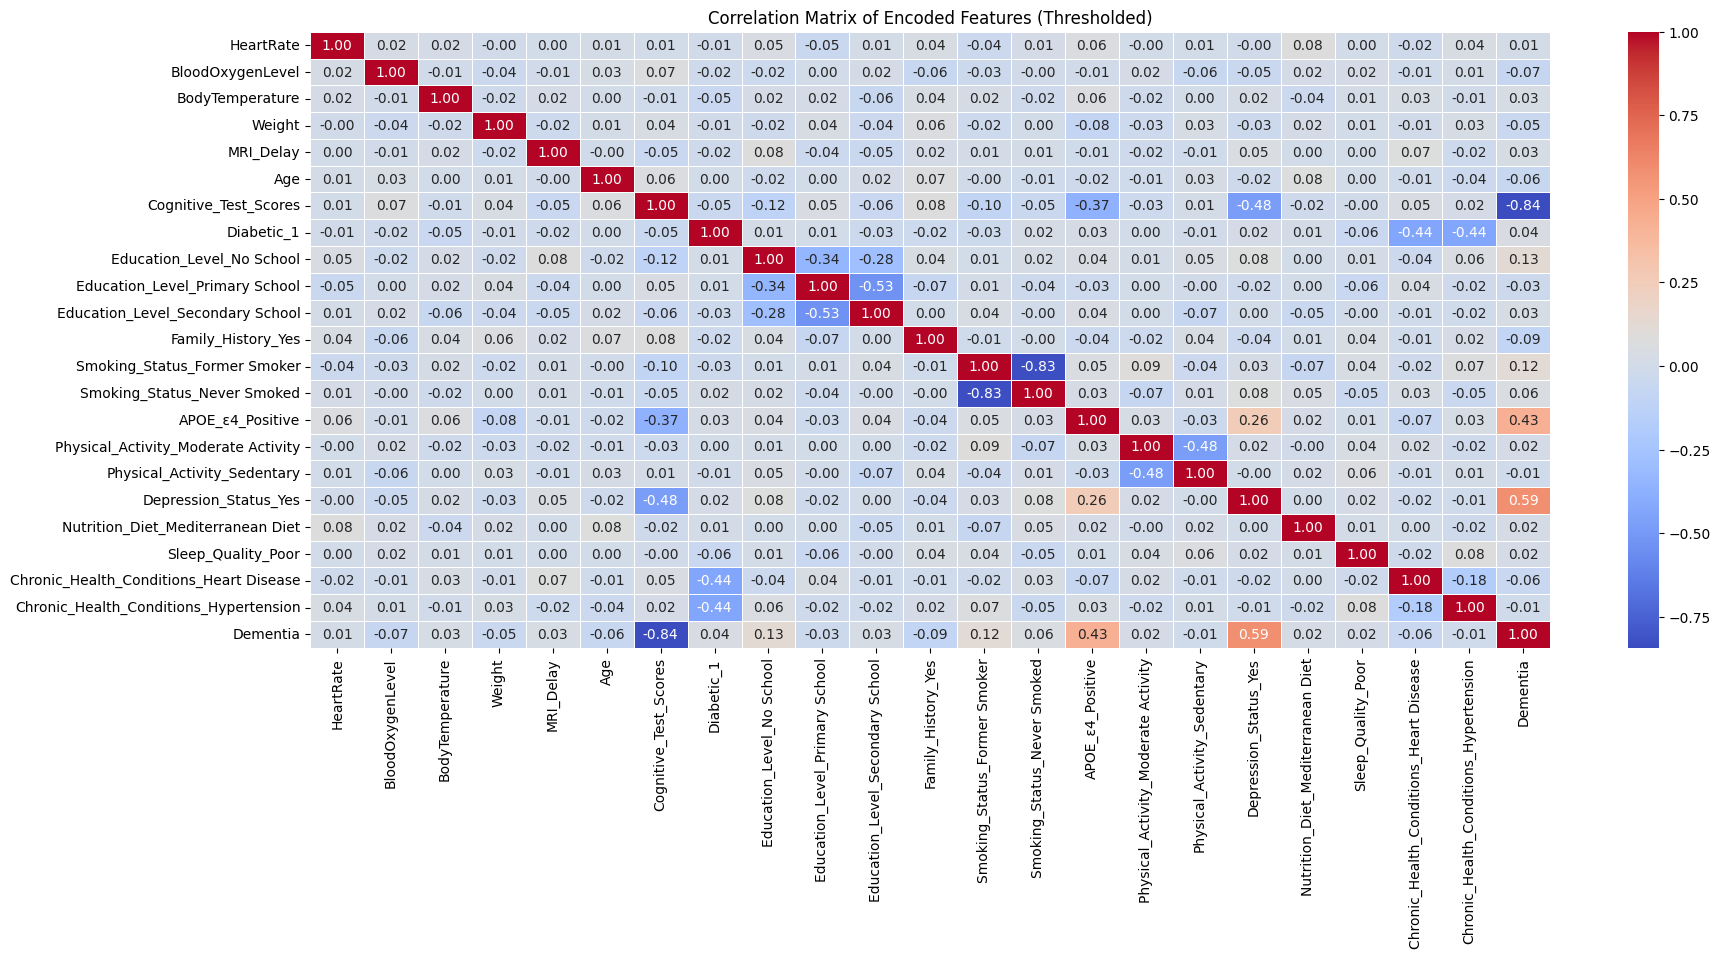

In [18]:
import numpy as np

# List of categorical columns to one-hot encode
categorical_columns = ['Diabetic', 'Education_Level', 'Dominant_Hand', 'Gender', 'Family_History', 'Smoking_Status', 'APOE_ε4', 'Physical_Activity', 'Depression_Status', 'Medication_History', 'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

# Calculate the correlation of each feature with 'Dementia'
correlations = df_encoded.corr()['Dementia'].abs()

# Set the threshold
threshold = 0.01

# Filter features based on the threshold
selected_features = correlations[correlations > threshold].index.tolist()

# Include 'Dementia' at the end
selected_features.remove('Dementia')
selected_features.append('Dementia')

# Create a subset DataFrame with selected features
correlation_matrix = df_encoded[selected_features].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Encoded Features (Thresholded)')
plt.show()


Within our correlation matrix analysis, we have identified strong correlations among several key variables. Notably, there is a significant positive correlation between depression, APOE ε3 status, cognitive test scores below 8, educational background (specifically, 'school' variables), and diabetes. This implies that individuals with lower cognitive test scores and a history of depression are more likely to exhibit certain educational backgrounds, such as 'school' variables, and potentially have a higher prevalence of diabetes. Understanding these correlations is essential as it sheds light on potential interdependencies among these factors, which could be vital for designing targeted interventions and predictive models in the context of our project.

* Setting threshold to **0.01** in the correlation analysis serves as a practical way to focus on the most meaningful relationships within the dataset. By filtering out correlations below this threshold, we narrow our attention to associations that have a moderate or stronger influence on the target variable, "Dementia." This not only simplifies the interpretation of the correlation matrix but also helps identify the most relevant features for further analysis and model development. It strikes a balance between retaining essential information and reducing noise, ensuring that our subsequent insights and decisions are based on statistically significant associations.

# Data Preparation

* Feature engineering and selection
* Data normalization or standardization
* Splitting the dataset into training, validation, and test sets

In [19]:
df_encoded.head()

,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Age,Cognitive_Test_Scores,Dementia,Diabetic_1,...,Physical_Activity_Moderate Activity,Physical_Activity_Sedentary,Depression_Status_Yes,Medication_History_Yes,Nutrition_Diet_Low-Carb Diet,Nutrition_Diet_Mediterranean Diet,Sleep_Quality_Poor,Chronic_Health_Conditions_Heart Disease,Chronic_Health_Conditions_Hypertension,Chronic_Health_Conditions_None
0,0.084974,98,96.230743,36.224852,57.563978,36.421028,60,10,0,1,...,0,1,0,0,1,0,1,0,0,0
1,0.016973,78,93.032122,36.183874,56.832335,31.157633,61,1,1,0,...,1,0,0,1,1,0,1,1,0,0
2,0.009000,89,93.566504,37.326321,59.759066,37.640435,69,8,0,0,...,1,0,0,0,0,1,1,1,0,0
3,0.086437,60,93.906510,37.030620,58.266471,50.673992,78,5,1,0,...,0,0,1,1,0,0,1,0,1,0
4,0.150747,67,97.508994,36.062121,67.705027,27.810601,77,0,1,1,...,0,0,0,1,1,0,0,0,0,0


In [20]:
df_encoded.shape

(1000, 29)

### Save as test dataset

In [21]:
df_encoded.to_csv('dementia_patients_health_data_test.csv')

### Using SMOTE to Duplicate Dataset

In [22]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separate the features (X) and the target variable (y)
X = df_encoded.drop(columns=['Dementia'])  # Assuming 'Dementia' is the target variable
y = df_encoded['Dementia']

# Calculate the current class distribution
class_distribution = dict(Counter(y))

# Define the desired oversampling ratio (5 times as many samples)
oversampling_ratio = 10.0

# Calculate the target number of samples for the minority class
minority_class = min(class_distribution, key=class_distribution.get)
target_samples = int(class_distribution[minority_class] * oversampling_ratio)

# Initialize SMOTE with the calculated target number of samples
smote = SMOTE(sampling_strategy={minority_class: target_samples}, random_state=42)

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_encoded = pd.DataFrame(X_resampled, columns=X.columns)
df_encoded['Dementia'] = y_resampled

# Check the shape of the resampled DataFrame
print(df_encoded.shape)


(5365, 29)


### PCA (Principal Component Analysis) Feature Selection

In [23]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

# Fit PCA on the encoded dataset
X_pca = pca.fit_transform(df_encoded.drop(columns=['Dementia']))
y = df_encoded['Dementia']


In [24]:
# Retrieve explained variance
explained_variance = pca.explained_variance_

# Now proceed with sorting and selecting components
sorted_indices = np.argsort(explained_variance)[::-1]
top_10_components = sorted_indices[:10]  # Choose the top 10 components


# Print the total number of PCA components
num_total_components = len(explained_variance)
print(f"Total PCA Components: {num_total_components}")

# Print the features contributing to the top 10 PCA components
for i, component_idx in enumerate(top_10_components):
    component = pca.components_[component_idx]
    print(f"PCA Component {i + 1} Features:")
    component_features = X.columns[np.abs(component) > threshold]  # Select features with significant contribution
    print(component_features)
    
    # Calculate and print the correlation scores
    component_correlations = component[np.abs(component) > threshold]
    for feature, correlation in zip(component_features, component_correlations):
        print(f"{feature}: {correlation:.3f}")

# Number of features before PCA
num_original_features = df_encoded.shape[1] - 1  # Subtract 1 for 'Dementia'

# Number of PCA components (considering the top 10 components)
num_components = len(top_10_components)

print(f"\nNumber of PCA Components (Top 10): {num_components}")

# Total parameters retained (considering the top 10 components)
total_parameters_retained = num_components * (num_original_features + 1)  # Add 1 for 'Dementia'

print(f"Total Parameters Retained (Top 10): {total_parameters_retained}")


Total PCA Components: 28
PCA Component 1 Features:
Index(['HeartRate', 'Weight', 'MRI_Delay', 'Age', 'Cognitive_Test_Scores'], dtype='object')
HeartRate: -0.011
Weight: 0.113
MRI_Delay: -0.993
Age: -0.039
Cognitive_Test_Scores: 0.014
PCA Component 2 Features:
Index(['BloodOxygenLevel', 'Weight', 'MRI_Delay', 'Age'], dtype='object')
BloodOxygenLevel: -0.017
Weight: 0.993
MRI_Delay: 0.114
Age: -0.021
PCA Component 3 Features:
Index(['HeartRate', 'MRI_Delay'], dtype='object')
HeartRate: 1.000
MRI_Delay: -0.011
PCA Component 4 Features:
Index(['BloodOxygenLevel', 'Weight', 'MRI_Delay', 'Age',
       'Cognitive_Test_Scores'],
      dtype='object')
BloodOxygenLevel: 0.019
Weight: 0.026
MRI_Delay: -0.035
Age: 0.998
Cognitive_Test_Scores: 0.027
PCA Component 5 Features:
Index(['BloodOxygenLevel', 'MRI_Delay', 'Age', 'Cognitive_Test_Scores',
       'Education_Level_Primary School', 'Dominant_Hand_Right', 'Gender_Male',
       'Family_History_Yes', 'Smoking_Status_Never Smoked', 'APOE_ε4_Positiv

**Explanation:**
* PCA reduces the dimensionality of the dataset by transforming the original features into a set of orthogonal components.
The number of PCA components determines the new feature space. In this case, we are using the top 5 PCA components.
Each component contributes to the model's representation of the data.
The total parameters retained represent the number of parameters needed to describe these components.
This reduction in parameters can help simplify the model and reduce the risk of overfitting.

### Selected Features

In [25]:
# Total parameters retained for selected features
total_parameters_retained_selected = len(selected_features)

print(f"Total Parameters Retained for Selected Features: {total_parameters_retained_selected}\n")

# Print the correlation score for each selected feature
print("Correlation Scores for Selected Features:")
for feature in selected_features:
    correlation = correlations[feature]
    print(f"{feature}: {correlation:.3f}")


Total Parameters Retained for Selected Features: 23

Correlation Scores for Selected Features:
HeartRate: 0.012
BloodOxygenLevel: 0.071
BodyTemperature: 0.034
Weight: 0.050
MRI_Delay: 0.031
Age: 0.062
Cognitive_Test_Scores: 0.843
Diabetic_1: 0.045
Education_Level_No School: 0.126
Education_Level_Primary School: 0.031
Education_Level_Secondary School: 0.033
Family_History_Yes: 0.089
Smoking_Status_Former Smoker: 0.120
Smoking_Status_Never Smoked: 0.055
APOE_ε4_Positive: 0.427
Physical_Activity_Moderate Activity: 0.016
Physical_Activity_Sedentary: 0.011
Depression_Status_Yes: 0.587
Nutrition_Diet_Mediterranean Diet: 0.021
Sleep_Quality_Poor: 0.020
Chronic_Health_Conditions_Heart Disease: 0.056
Chronic_Health_Conditions_Hypertension: 0.012
Dementia: 1.000


# Model Building

* Selection of deep learning architecture
* Configuration of layers and neurons
* Choice of optimizers and loss functions

* Training Set: This is the set of data used to train your machine learning model. The model learns from this data.

* Validation Set: The validation set is used to fine-tune hyperparameters, such as learning rates or regularization strengths. You train your model on the training set and evaluate its performance on the validation set. This helps you choose the best hyperparameters and avoid overfitting to the training data.

* Test Set: The test set is used to evaluate the final performance of your trained model. It's a completely independent dataset that the model has never seen during training or validation. It gives you an unbiased estimate of how well your model is likely to perform on new, unseen data.

### Split data for PCA Features

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# Split the dataset into training, validation, and test sets for PCA features
X_train_pca, X_temp_pca, y_train_pca, y_temp_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)


#X_valid_pca, X_test_pca, y_valid_pca, y_test_pca = train_test_split(X_temp_pca, y_temp_pca, test_size=0.5, random_state=42)

### Split data for Selected Features

In [28]:
X_selected = df_encoded[selected_features[:-1]]

In [29]:
X_selected.shape

(5365, 22)

In [30]:
# Split the dataset into training, validation, and test sets for selected features
X_train_selected, X_temp_selected, y_train_selected, y_temp_selected = train_test_split(X_selected, y, test_size=0.3, random_state=42)


#X_valid_selected, X_test_selected, y_valid_selected, y_test_selected = train_test_split(X_temp_selected, y_temp_selected, test_size=0.5, random_state=42)


In [31]:
# Use X_temp_pca and y_temp_pca as your test sets
X_test_pca, y_test_pca = X_temp_pca, y_temp_pca
X_test_selected, y_test_selected = X_temp_selected, y_temp_selected

In [32]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Build Deep Learning Models:
 
Create Deep Learning models for both PCA features and selected features
Train the models on the training data.
* Evaluate the models on the validation data to calculate accuracy.
* Compare Model Performances:

Compare the accuracy of the models using PCA features and selected features.
* Select the model that yields the highest accuracy on the validation data.

* Input Layer: Dense layer with 32 neurons and ReLU activation.
* Hidden Layer: Dense layer with 16 neurons and ReLU activation.
* Output Layer: Dense layer with 1 neuron and sigmoid activation (commonly used for binary classification).
* The optimizer used is 'adam,' and the loss function is 'binary_crossentropy' (appropriate for binary classification problems). The model is trained for a specified number of epochs (default is 20), and a checkpoint is used to save the best model based on validation accuracy.

In [33]:
# Define a function to build and train a Deep Learning model
def build_and_train_model(X_train, y_train, X_valid, y_valid, epochs=20):
    model = keras.Sequential([
        keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Define callbacks to save the best model based on validation accuracy
    checkpoint = keras.callbacks.ModelCheckpoint(filepath="best_model.h5", monitor="val_accuracy", save_best_only=True, verbose=0)
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_valid, y_valid), verbose=1, callbacks=[checkpoint])
    
    # Load the best model based on validation accuracy
    best_model = keras.models.load_model("best_model.h5")
    
    # Predict on validation set
    y_pred = (best_model.predict(X_valid) > 0.5).astype(int)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_valid, y_pred)


# Plot training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Find the epoch with the best validation accuracy
    best_epoch = np.argmax(history.history['val_accuracy']) + 1
    
    print(f"Best Epoch: {best_epoch}")
    print(f"Validation Accuracy at Best Epoch: {history.history['val_accuracy'][best_epoch-1]:.4f}")
    
    return best_model, accuracy

# Model Training and Validation

* Training the model on the dataset
* Evaluating model performance on validation data
* Tuning hyperparameters

Epoch 1/20
118/118 [==============================] - 1s 3ms/step - loss: 0.5449 - accuracy: 0.8120 - val_loss: 0.2677 - val_accuracy: 0.9050
Epoch 2/20
118/118 [==============================] - 0s 1ms/step - loss: 0.2114 - accuracy: 0.9238 - val_loss: 0.1746 - val_accuracy: 0.9242
Epoch 3/20
118/118 [==============================] - 0s 1ms/step - loss: 0.1373 - accuracy: 0.9515 - val_loss: 0.1107 - val_accuracy: 0.9658
Epoch 4/20
118/118 [==============================] - 0s 1ms/step - loss: 0.0899 - accuracy: 0.9728 - val_loss: 0.0768 - val_accuracy: 0.9832
Epoch 5/20
118/118 [==============================] - 0s 1ms/step - loss: 0.0645 - accuracy: 0.9848 - val_loss: 0.0552 - val_accuracy: 0.9863
Epoch 6/20
118/118 [==============================] - 0s 1ms/step - loss: 0.0472 - accuracy: 0.9885 - val_loss: 0.0475 - val_accuracy: 0.9857
Epoch 7/20
118/118 [==============================] - 0s 1ms/step - loss: 0.0371 - accuracy: 0.9909 - val_loss: 0.0372 - val_accuracy: 0.9901
Epoch 

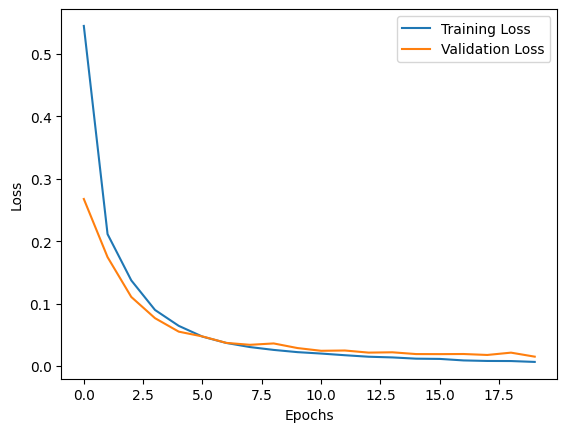

Best Epoch: 16
Validation Accuracy at Best Epoch: 0.9944
PCA Model Performance:
Data Accuracy: 0.9944
Epoch 1/20
118/118 [==============================] - 1s 2ms/step - loss: 0.7581 - accuracy: 0.8775 - val_loss: 0.2152 - val_accuracy: 0.9217
Epoch 2/20
118/118 [==============================] - 0s 1ms/step - loss: 0.1716 - accuracy: 0.9324 - val_loss: 0.1435 - val_accuracy: 0.9379
Epoch 3/20
118/118 [==============================] - 0s 1ms/step - loss: 0.1154 - accuracy: 0.9529 - val_loss: 0.1160 - val_accuracy: 0.9689
Epoch 4/20
118/118 [==============================] - 0s 1ms/step - loss: 0.0822 - accuracy: 0.9755 - val_loss: 0.0850 - val_accuracy: 0.9596
Epoch 5/20
118/118 [==============================] - 0s 1ms/step - loss: 0.0697 - accuracy: 0.9766 - val_loss: 0.0583 - val_accuracy: 0.9814
Epoch 6/20
118/118 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9877 - val_loss: 0.0503 - val_accuracy: 0.9839
Epoch 7/20
118/118 [==========================

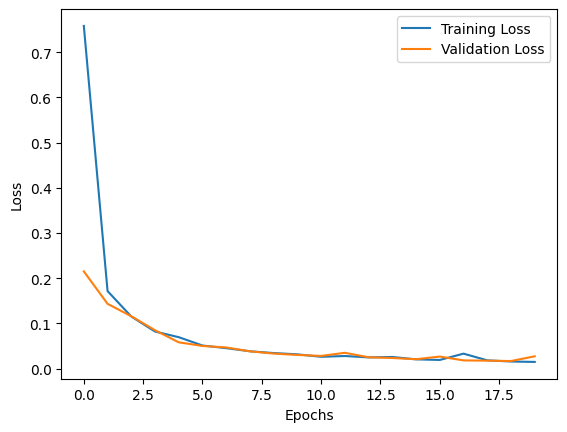

Best Epoch: 18
Validation Accuracy at Best Epoch: 0.9938
Selected Features Model Performance:
Data Accuracy: 0.9938


In [34]:
# Train and evaluate models for PCA features
pca_model, pca_accuracy = build_and_train_model(X_train_pca, y_train_pca, X_test_pca, y_test_pca, epochs=20)

print("PCA Model Performance:")
print(f"Data Accuracy: {pca_accuracy:.4f}")

# Train and evaluate models for selected features
selected_model, selected_accuracy = build_and_train_model(X_train_selected, y_train_selected, X_test_selected, y_test_selected, epochs=20)

print("Selected Features Model Performance:")
print(f"Data Accuracy: {selected_accuracy:.4f}")


In [35]:
# Compare accuracies and select the best model
best_model = None
best_accuracy = 0.0

if pca_accuracy >= selected_accuracy:
    best_model = pca_model
    best_accuracy = pca_accuracy
    print("Best Model: PCA")
else:
    best_model = selected_model
    best_accuracy = selected_accuracy
    print("Best Model: Selected Features")

print(f"Best Model Accuracy: {best_accuracy:.4f}")


Best Model: PCA
Best Model Accuracy: 0.9944


In [36]:
# Import necessary libraries
from keras.models import load_model

# Load the best model (replace 'best_model.h5' with the actual path if needed)
model = load_model('best_model.h5')

# Display the model summary to see the shape of each layer
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                736       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [37]:
X_pca.shape

(5365, 28)

In [38]:
X_selected.columns

Index(['HeartRate', 'BloodOxygenLevel', 'BodyTemperature', 'Weight',
       'MRI_Delay', 'Age', 'Cognitive_Test_Scores', 'Diabetic_1',
       'Education_Level_No School', 'Education_Level_Primary School',
       'Education_Level_Secondary School', 'Family_History_Yes',
       'Smoking_Status_Former Smoker', 'Smoking_Status_Never Smoked',
       'APOE_ε4_Positive', 'Physical_Activity_Moderate Activity',
       'Physical_Activity_Sedentary', 'Depression_Status_Yes',
       'Nutrition_Diet_Mediterranean Diet', 'Sleep_Quality_Poor',
       'Chronic_Health_Conditions_Heart Disease',
       'Chronic_Health_Conditions_Hypertension'],
      dtype='object')

In [39]:
X_test_selected.shape

(1610, 22)

In [40]:
X_selected.shape

(5365, 22)

### Predicting test data

In [41]:
import pandas as pd
from keras.models import load_model

# Load your trained model (replace 'best_model.h5' with your model's file path)
model = load_model('best_model.h5')

# Make predictions on X_test_selected
predictions_prob = model.predict(X_test_selected)
predictions = (predictions_prob > 0.5).astype(int).flatten()

# Assuming 'y_test_selected' is the actual labels for X_test_selected
comparison_df = pd.DataFrame({
    'Actual Dementia': y_test_selected, 
    'Predicted Dementia': predictions
})

correct_predictions = sum(comparison_df['Actual Dementia'] == comparison_df['Predicted Dementia'])
total_predictions = len(comparison_df)

print(f"Correct Predictions: {correct_predictions} out of {total_predictions}")
comparison_df.head(10)


51/51 [==============================] - 0s 591us/step
Correct Predictions: 1600 out of 1610


,Actual Dementia,Predicted Dementia
5062,1,1
1557,1,1
3922,1,1
1103,1,1
4622,1,1
401,0,0
3658,1,1
279,1,1
2614,1,1
4149,1,1


In [43]:
import pandas as pd
from keras.models import load_model

# Load your trained model (replace 'best_model.h5' with your model's file path)
model = load_model('best_model.h5')

# Function to collect user input
def get_user_input():
    user_input = {}

    # Collect user input for each feature
    user_input['HeartRate'] = float(input("Enter Heart Rate (60<): "))
    user_input['BloodOxygenLevel'] = float(input("Enter Blood Oxygen Level (90-100): "))
    user_input['BodyTemperature'] = float(input("Enter Body Temperature (35<): "))
    user_input['Weight'] = float(input("Enter Weight: "))
    user_input['MRI_Delay'] = float(input("Enter MRI Delay (0<): "))
    user_input['Age'] = float(input("Enter Age: "))
    user_input['Cognitive_Test_Scores'] = float(input("Enter Cognitive Test Scores (0-10): "))
    user_input['Diabetic_1'] = int(input("Enter Diabetic (0 or 1): "))
    user_input['Education_Level_No School'] = int(input("Enter Education Level (No School, 0 or 1): "))
    user_input['Education_Level_Primary School'] = int(input("Enter Education Level (Primary School, 0 or 1): "))
    user_input['Education_Level_Secondary School'] = int(input("Enter Education Level (Secondary School, 0 or 1): "))
    user_input['Family_History_Yes'] = int(input("Enter Family History (Yes, 0 or 1): "))
    user_input['Smoking_Status_Former Smoker'] = int(input("Enter Smoking Status (Former Smoker, 0 or 1): "))
    user_input['Smoking_Status_Never Smoked'] = int(input("Enter Smoking Status (Never Smoked, 0 or 1): "))
    user_input['APOE_ε4_Positive'] = int(input("Enter APOE_ε4 Positive (0 or 1): "))
    user_input['Physical_Activity_Moderate Activity'] = int(input("Enter Physical Activity (Moderate Activity, 0 or 1): "))
    user_input['Physical_Activity_Sedentary'] = int(input("Enter Physical Activity (Sedentary, 0 or 1): "))
    user_input['Depression_Status_Yes'] = int(input("Enter Depression Status (Yes, 0 or 1): "))
    user_input['Nutrition_Diet_Mediterranean Diet'] = int(input("Enter Nutrition Diet (Mediterranean Diet, 0 or 1): "))
    user_input['Sleep_Quality_Poor'] = int(input("Enter Sleep Quality (Poor, 0 or 1): "))
    user_input['Chronic_Health_Conditions_Heart Disease'] = int(input("Enter Chronic Health Conditions (Heart Disease, 0 or 1): "))
    user_input['Chronic_Health_Conditions_Hypertension'] = int(input("Enter Chronic Health Conditions (Hypertension, 0 or 1): "))

    # Create a DataFrame from user input
    user_input_df = pd.DataFrame(user_input, index=[0])

    return user_input_df

# Get user input
user_input_data = get_user_input()

# Make predictions on the user input data
predictions_prob = model.predict(user_input_data)
predictions = (predictions_prob > 0.5).astype(int).flatten()

# Display the prediction message
if predictions[0] == 1:
    print("Dementia Risk")
else:
    print("Low Risk of Dementia")


Enter Heart Rate (60<):  70
Enter Blood Oxygen Level (90-100):  90
Enter Body Temperature (35<):  37
Enter Weight:  70
Enter MRI Delay (0<):  5
Enter Age:  70
Enter Cognitive Test Scores (0-10):  6
Enter Diabetic (0 or 1):  0
Enter Education Level (No School, 0 or 1):  1
Enter Education Level (Primary School, 0 or 1):  0
Enter Education Level (Secondary School, 0 or 1):  0
Enter Family History (Yes, 0 or 1):  1
Enter Smoking Status (Former Smoker, 0 or 1):  1
Enter Smoking Status (Never Smoked, 0 or 1):  0
Enter APOE_ε4 Positive (0 or 1):  1
Enter Physical Activity (Moderate Activity, 0 or 1):  0
Enter Physical Activity (Sedentary, 0 or 1):  0
Enter Depression Status (Yes, 0 or 1):  1
Enter Nutrition Diet (Mediterranean Diet, 0 or 1):  0
Enter Sleep Quality (Poor, 0 or 1):  1
Enter Chronic Health Conditions (Heart Disease, 0 or 1):  1
Enter Chronic Health Conditions (Hypertension, 0 or 1):  0


1/1 [==============================] - 0s 36ms/step
Dementia Risk


# Model Evaluation (Hyperparameter Tuning) on Validation Data
In this section, we perform hyperparameter tuning to optimize the performance of our neural network model on the validation data. Hyperparameter tuning is a crucial step in the machine learning workflow to find the best combination of hyperparameters that result in a well-performing model.

1) Regularization

* One of the techniques we employ for preventing overfitting is regularization. Specifically, we add dropout layers to our model. Dropout is a regularization technique that randomly sets a fraction of input units to zero during each update, which helps in reducing overfitting by preventing the network from relying too heavily on any single neuron.

2. Learning Rate

* We experiment with different learning rates to find the one that works best for our dataset. The learning rate determines the step size at which the model's weights are updated during training. Setting it to 0.001, as done in this tuning process, is just one of the values to try. Different datasets and models may require different learning rates to converge effectively.

3. Batch Size

* We also explore different batch sizes during training. The batch size specifies the number of samples that are used in each iteration of training. Smaller batch sizes may provide a more stable training process, while larger batch sizes can speed up training but may be less stable. It's essential to find the batch size that balances these factors for our specific dataset.

4. Monitor Early Stopping

* To prevent overfitting, we implement early stopping based on validation loss. Early stopping monitors the validation loss during training and stops training when the loss starts increasing, indicating overfitting. This helps us find the point where the model performs best on the validation data while avoiding overfitting to the training data.

5. Evaluation Metrics and Criteria

* During hyperparameter tuning, we analyze various evaluation metrics and criteria to assess the model's performance. These metrics may include accuracy, precision, recall, F1 score, and more. By carefully examining these metrics, we can make informed decisions about which hyperparameters result in the best model performance.

6. Configuration of Layers and Neurons

* The architecture of the neural network, including the configuration of layers and the number of neurons in each layer, plays a significant role in the model's performance. We explore different configurations to identify the architecture that suits our dataset and problem.

7. Choice of Optimizers and Loss Functions

* Lastly, we consider different optimizers and loss functions. The optimizer determines how the model's weights are updated during training, and the choice of loss function affects how the model's performance is measured. These choices are important for optimizing model convergence and performance.


C:\Users\nasru\AppData\Local\Temp\ipykernel_14528\3158411990.py:33: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_search = GridSearchCV(estimator=keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=0), param_grid=param_grid, cv=3, scoring='accuracy')


40/40 [==============================] - 0s 996us/step
Best Hyperparameters:
{'activation': 'sigmoid', 'batch_size': 64, 'epochs': 30, 'learning_rate': 0.01, 'optimizer': 'adam'}
Best Accuracy: 0.9973
Epoch with Best Validation Accuracy: 8
Total Time to Train: 702.49 seconds


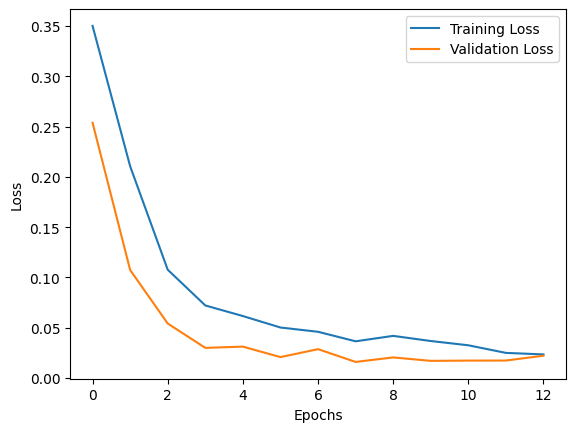

In [45]:
import keras
from sklearn.model_selection import GridSearchCV
from keras.callbacks import EarlyStopping
import time  # Import the time module for measuring training time

# Define hyperparameters to search
param_grid = {
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 30],  # Add more epoch values if needed
    'activation': ['relu', 'sigmoid'],
    'learning_rate': [0.001, 0.01, 0.1],
    'optimizer': ['adam', 'sgd']  # Include different optimizers here
}

def create_model(activation='relu', learning_rate=0.001, optimizer='adam'):
    model = keras.Sequential([
        keras.layers.Dense(32, activation=activation, input_shape=(X_train_pca.shape[1],)),
        keras.layers.Dropout(0.5),  # Adjust dropout rate as needed
        keras.layers.Dense(16, activation=activation),
        keras.layers.Dropout(0.5),  # Adjust dropout rate as needed
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    if optimizer == 'adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = keras.optimizers.SGD(learning_rate=learning_rate)  # You can add more optimizers here
    
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the GridSearchCV object with EarlyStopping
grid_search = GridSearchCV(estimator=keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=0), param_grid=param_grid, cv=3, scoring='accuracy')

# Implement EarlyStopping based on validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Measure the start time
start_time = time.time()

# Perform the grid search with EarlyStopping
grid_search.fit(X_train_pca, y_train_pca, validation_data=(X_temp_pca, y_temp_pca), callbacks=[early_stopping])

# Measure the end time
end_time = time.time()

# Calculate the total time taken for training
total_time = end_time - start_time

# Get the best hyperparameters
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
# Calculate the epoch with the best validation accuracy
best_epoch = early_stopping.stopped_epoch - early_stopping.patience + 1

print("Best Hyperparameters:")
print(best_params)
print(f"Best Accuracy: {best_accuracy:.4f}")
print(f"Epoch with Best Validation Accuracy: {best_epoch}")
print(f"Total Time to Train: {total_time:.2f} seconds")

# Plot training and validation loss
history = grid_search.best_estimator_.model.history.history
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [46]:
# Save the tuned model
model.save('tuned_model.h5')

* In summary, hyperparameter tuning involves systematically exploring various hyperparameters, regularization techniques, and architectural choices to create a neural network model that performs optimally on the validation data. This process helps us fine-tune our model to achieve the best results for our specific problem.

### Confusion Matrix after Tuning

51/51 [==============================] - 0s 1ms/step


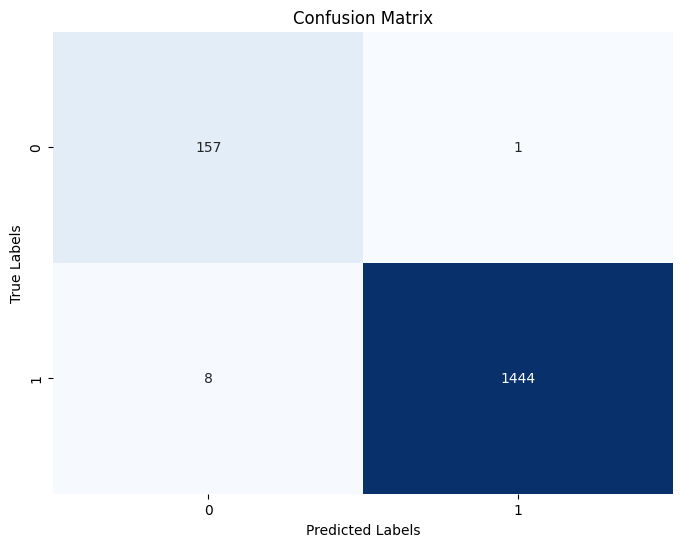

In [47]:
# Make predictions on the test data
y_pred_test = grid_search.best_estimator_.predict(X_test_pca)

# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_result = confusion_matrix(y_test_pca, y_pred_test)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [48]:
# Print classifcation report

from sklearn.metrics import classification_report

# Calculate the classification report
classification_report_result = classification_report(y_test_pca, y_pred_test)

# Print the classification report
print("Classification Report:")
print(classification_report_result)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       158
           1       1.00      0.99      1.00      1452

    accuracy                           0.99      1610
   macro avg       0.98      0.99      0.98      1610
weighted avg       0.99      0.99      0.99      1610



# Model Testing (Test Data)

* Assessing model performance on test data
* Detailed analysis of model results
* Comparing model performance with test data

In [49]:
from keras.models import load_model

# Load the saved model
tuned_model = load_model('tuned_model.h5')

tuned_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                736       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [51]:
import pandas as pd
from keras.models import load_model

# Load your trained model (replace 'tuned_model.h5' with your model's file path)
tuned_model = load_model('tuned_model.h5')

# Make predictions on X_test_pca (replace with your test data)
predictions_prob = tuned_model.predict(X_test_selected)
predictions = (predictions_prob > 0.5).astype(int).flatten()

# Assuming 'y_test_pca' is the actual labels for X_test_pca
comparison_df = pd.DataFrame({
    'Actual Labels': y_test_pca, 
    'Predicted Labels': predictions
})

correct_predictions = sum(comparison_df['Actual Labels'] == comparison_df['Predicted Labels'])
total_predictions = len(comparison_df)

print(f"Correct Predictions: {correct_predictions} out of {total_predictions}")
comparison_df.head(10)

51/51 [==============================] - 0s 604us/step
Correct Predictions: 1600 out of 1610


,Actual Labels,Predicted Labels
5062,1,1
1557,1,1
3922,1,1
1103,1,1
4622,1,1
401,0,0
3658,1,1
279,1,1
2614,1,1
4149,1,1


In [54]:
X_temp_selected.shape

(1610, 22)

In [53]:
X_selected.shape

(5365, 22)

## Testing User Input

In [2]:
import pandas as pd
from keras.models import load_model

# Load your trained model (replace 'tuned_model.h5' with your model's file path)
tuned_model = load_model('tuned_model.h5')

# Function to collect user input
def get_user_input():
    user_input = {}

    # Collect user input for each feature
    user_input['HeartRate'] = float(input("Enter Heart Rate (60<): "))
    user_input['BloodOxygenLevel'] = float(input("Enter Blood Oxygen Level (90-100): "))
    user_input['BodyTemperature'] = float(input("Enter Body Temperature (35<): "))
    user_input['Weight'] = float(input("Enter Weight: "))
    user_input['MRI_Delay'] = float(input("Enter MRI Delay (0<): "))
    user_input['Age'] = float(input("Enter Age: "))
    user_input['Cognitive_Test_Scores'] = float(input("Enter Cognitive Test Scores (0-10): "))
    user_input['Diabetic_1'] = int(input("Enter Diabetic (0 or 1): "))
    user_input['Education_Level_No School'] = int(input("Enter Education Level (No School, 0 or 1): "))
    user_input['Education_Level_Primary School'] = int(input("Enter Education Level (Primary School, 0 or 1): "))
    user_input['Education_Level_Secondary School'] = int(input("Enter Education Level (Secondary School, 0 or 1): "))
    user_input['Family_History_Yes'] = int(input("Enter Family History (Yes, 0 or 1): "))
    user_input['Smoking_Status_Former Smoker'] = int(input("Enter Smoking Status (Former Smoker, 0 or 1): "))
    user_input['Smoking_Status_Never Smoked'] = int(input("Enter Smoking Status (Never Smoked, 0 or 1): "))
    user_input['APOE_ε4_Positive'] = int(input("Enter APOE_ε4 Positive (0 or 1): "))
    user_input['Physical_Activity_Moderate Activity'] = int(input("Enter Physical Activity (Moderate Activity, 0 or 1): "))
    user_input['Physical_Activity_Sedentary'] = int(input("Enter Physical Activity (Sedentary, 0 or 1): "))
    user_input['Depression_Status_Yes'] = int(input("Enter Depression Status (Yes, 0 or 1): "))
    user_input['Nutrition_Diet_Mediterranean Diet'] = int(input("Enter Nutrition Diet (Mediterranean Diet, 0 or 1): "))
    user_input['Sleep_Quality_Poor'] = int(input("Enter Sleep Quality (Poor, 0 or 1): "))
    user_input['Chronic_Health_Conditions_Heart Disease'] = int(input("Enter Chronic Health Conditions (Heart Disease, 0 or 1): "))
    user_input['Chronic_Health_Conditions_Hypertension'] = int(input("Enter Chronic Health Conditions (Hypertension, 0 or 1): "))

    # Create a DataFrame from user input
    user_input_df = pd.DataFrame(user_input, index=[0])

    return user_input_df

# Get user input
user_input_data = get_user_input()

# Make predictions on the user input data
predictions_prob = tuned_model.predict(user_input_data)
prediction_accuracy = predictions_prob[0][0]  # Assuming binary classification

# Display the prediction message
if prediction_accuracy >= 0.5:
    print("Dementia Risk")
else:
    print("Low Risk of Dementia")

print("Probability of Dementia:", prediction_accuracy)


Enter Heart Rate (60<):  70
Enter Blood Oxygen Level (90-100):  95
Enter Body Temperature (35<):  36
Enter Weight:  70
Enter MRI Delay (0<):  4
Enter Age:  70
Enter Cognitive Test Scores (0-10):  7
Enter Diabetic (0 or 1):  1
Enter Education Level (No School, 0 or 1):  0
Enter Education Level (Primary School, 0 or 1):  0
Enter Education Level (Secondary School, 0 or 1):  1
Enter Family History (Yes, 0 or 1):  1
Enter Smoking Status (Former Smoker, 0 or 1):  0
Enter Smoking Status (Never Smoked, 0 or 1):  1
Enter APOE_ε4 Positive (0 or 1):  0
Enter Physical Activity (Moderate Activity, 0 or 1):  1
Enter Physical Activity (Sedentary, 0 or 1):  0
Enter Depression Status (Yes, 0 or 1):  1
Enter Nutrition Diet (Mediterranean Diet, 0 or 1):  0
Enter Sleep Quality (Poor, 0 or 1):  1
Enter Chronic Health Conditions (Heart Disease, 0 or 1):  0
Enter Chronic Health Conditions (Hypertension, 0 or 1):  1


1/1 [==============================] - 0s 80ms/step
Dementia Risk
Probability of Dementia: 0.6266455


# Model Deployment

* Techniques for saving and serializing the model
* Preparing the model for deployment in a production environment
* Integration with MLOps practices for deployment

In the context of model deployment, I have successfully built a Flask web application designed to provide access to our machine learning model. This application has been deployed on GitHub, ensuring accessibility to the wider audience. To ensure a structured and efficient deployment process, I meticulously adhered to the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology. The heart of this deployment lies in the 'tuned_model.h5,' a crucial component of our project.

This trained model has been meticulously organized within a designated folder, and the entire application has been deployed on the Heroku platform. Additionally, I have integrated this deployment with MLOps (Machine Learning Operations) practices, ensuring that our model is readily available in a production environment, where it can be utilized to make predictions efficiently and effectively. This comprehensive deployment approach encompasses web development, version control, methodology adherence, and cloud-based hosting, making our machine learning solution accessible and practical.

Model is deployed in folder (models), "tuned_model.h5", and deployed to heroku.

The website (register as admin and go to Reports tab in the navbar):https://dementiadetection-51c4fdc49ae6.herokuapp.com/

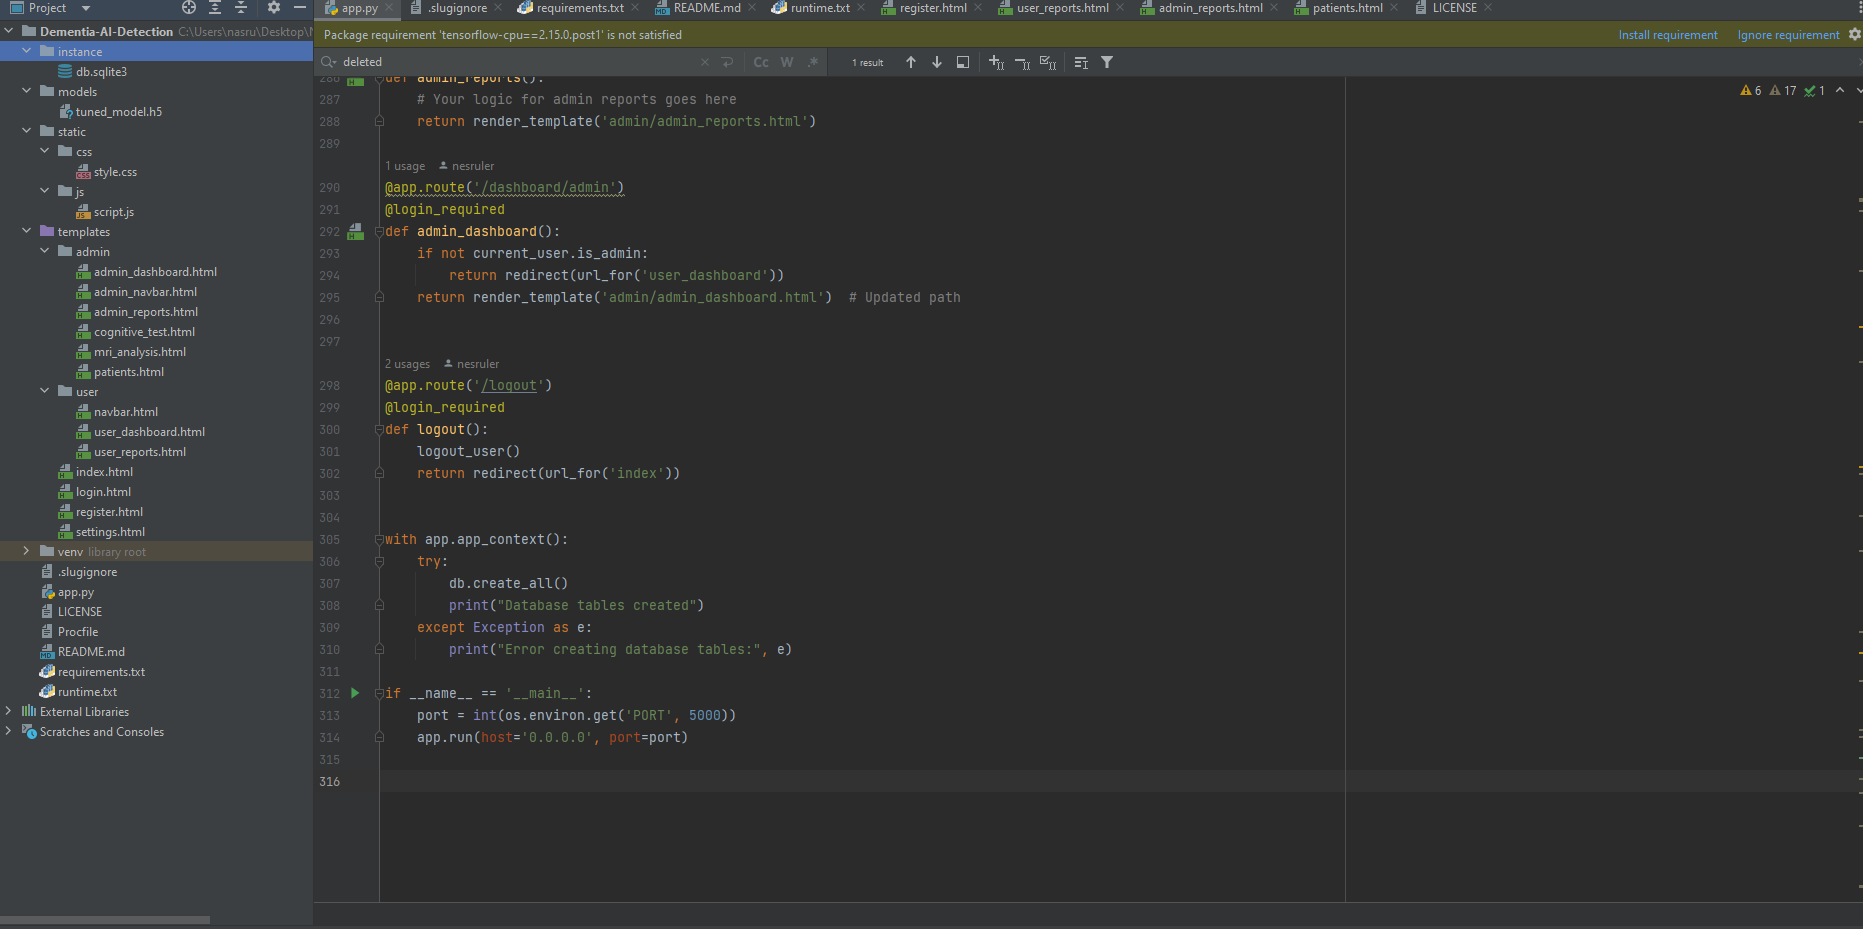

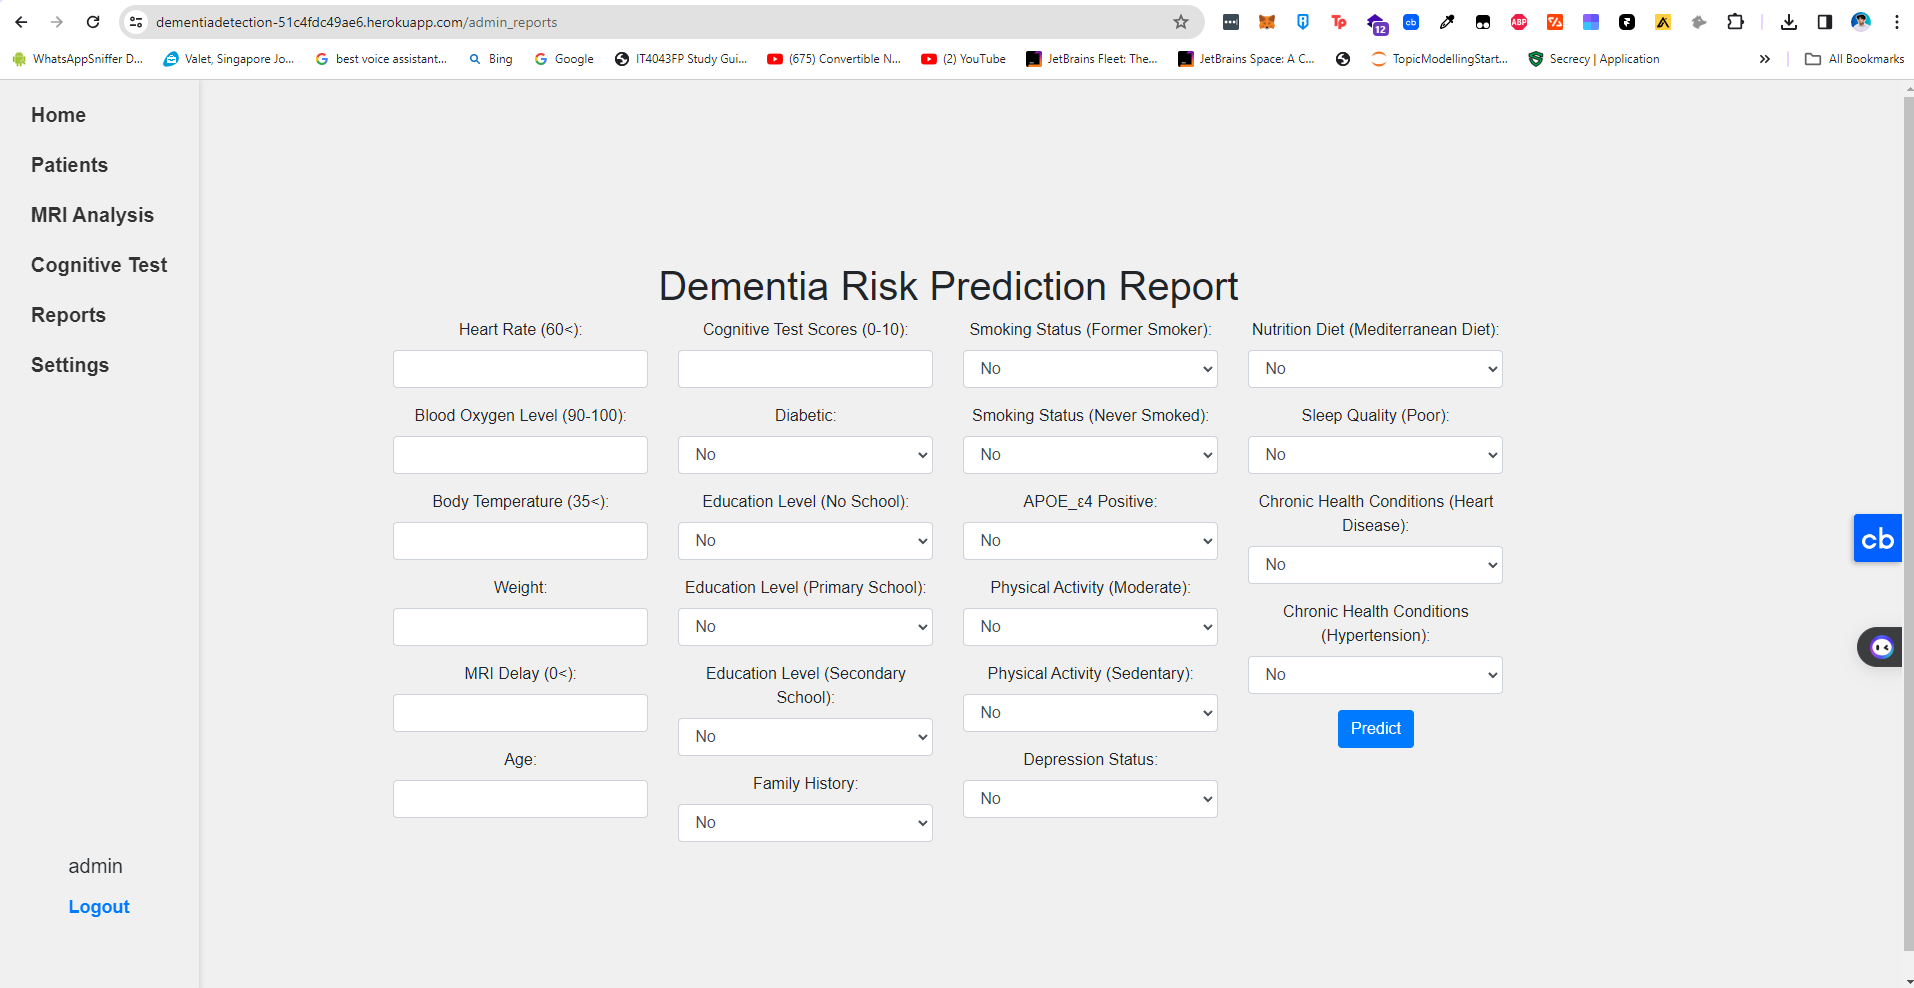

# Conclusion

* Summary of findings
* Implications and potential applications
* Future work or improvements


In our AI system's development, ethics and transparency have been paramount. We've meticulously sourced data from credible sources and conducted proactive risk assessments, documenting potential ethical challenges comprehensively. Our commitment to transparency extends to clear communication about our system's objectives, methodologies, and implications with stakeholders.

To ensure fairness and mitigate biases, we've rigorously examined our data and model development processes, implementing techniques for bias reduction. Ethical considerations guide our decision-making, prioritizing equitable outcomes. Going forward, we'll maintain our ethical focus, monitoring system performance and addressing potential challenges to uphold high ethical standards and deliver impactful, ethical AI solutions in healthcare.